In [1]:
import pandas as pd
import numpy as np
from scipy import ndimage
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Load train data

In [2]:
train_data = pd.read_csv("exoTrain.csv")
print("(rows, columns) in train data:", train_data.shape)
print(train_data.groupby('LABEL').size())

(rows, columns) in train data: (5087, 3198)
LABEL
1    5050
2      37
dtype: int64


# Load test data

In [3]:
test_data = pd.read_csv("exoTest.csv")
print("(rows, columns) in test data:", test_data.shape)
print(test_data.groupby('LABEL').size())

(rows, columns) in test data: (570, 3198)
LABEL
1    565
2      5
dtype: int64


## Prepare X_train, y_train, X_test, y_test

In [4]:
X_train = np.array(train_data.drop(['LABEL'], 1))
y_train = np.array(train_data['LABEL'])
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

X_test = np.array(test_data.drop(['LABEL'], 1))
y_test = np.array(test_data['LABEL'])
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (5087, 3197)
y_train:  (5087,)
X_test:  (570, 3197)
y_test:  (570,)


# Plot

In [5]:
print("Flux from the first star (confirmed exoplanet):\n", X_train[0])
print("\nFlux from the last star (confirmed non-exoplanet):\n", X_train[-1])

Flux from the first star (confirmed exoplanet):
 [ 93.85  83.81  20.1  ...  61.42   5.08 -39.54]

Flux from the last star (confirmed non-exoplanet):
 [323.28 306.36 293.16 ... -16.72 -14.09  27.82]


In [6]:
time = np.arange(3197)
flux_star_with_exoplanet = X_train[0]
flux_star_without_exoplanet = X_train[-1]

### Scatter plot for star 1 with confirmed exoplanet

Text(0, 0.5, 'flux')

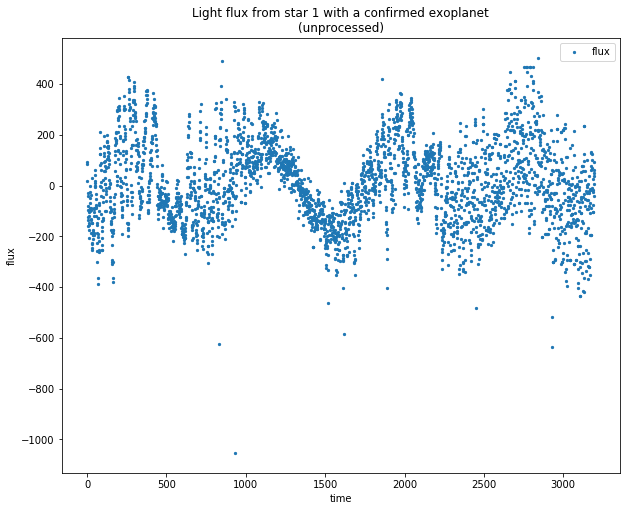

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_with_exoplanet, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 1 with a confirmed exoplanet\n(unprocessed)")
plt.xlabel('time')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

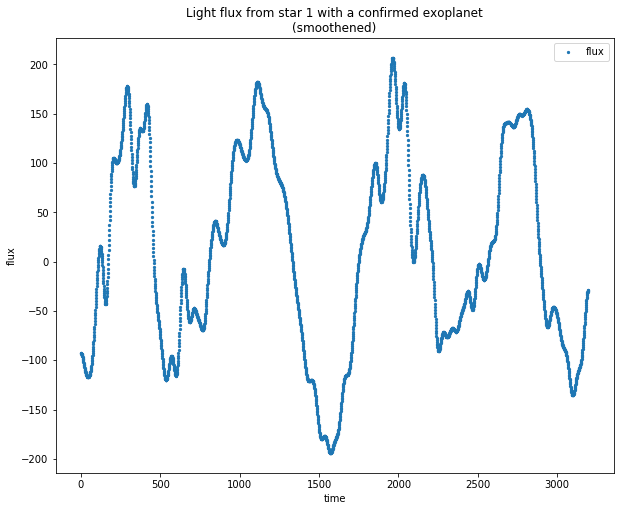

In [8]:
flux_star_with_exoplanet_smoothened = ndimage.filters.gaussian_filter(flux_star_with_exoplanet, sigma=20)
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_with_exoplanet_smoothened, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 1 with a confirmed exoplanet\n(smoothened)")
plt.xlabel('time')
plt.ylabel('flux')

### Scatter plot for star 5087 with confirmed non-exoplanet

Text(0, 0.5, 'flux')

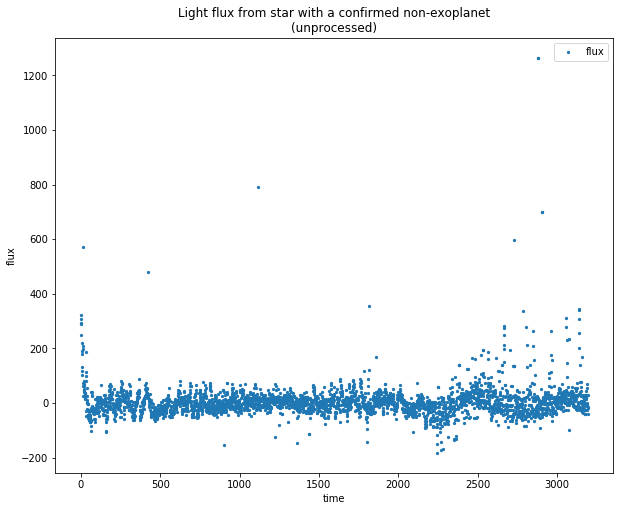

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_without_exoplanet, label='flux', s=5)
plt.legend()
plt.title("Light flux from star with a confirmed non-exoplanet\n(unprocessed)")
plt.xlabel('time')
plt.ylabel('flux')

Text(0, 0.5, 'flux')

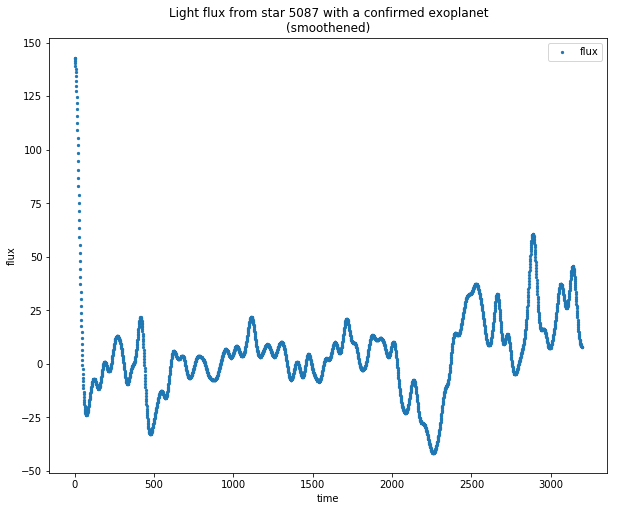

In [10]:
flux_star_without_exoplanet_smoothened = ndimage.filters.gaussian_filter(flux_star_without_exoplanet, sigma=20)
plt.figure(figsize=(10,8))
plt.scatter(time, flux_star_without_exoplanet_smoothened, label='flux', s=5)
plt.legend()
plt.title("Light flux from star 5087 with a confirmed exoplanet\n(smoothened)")
plt.xlabel('time')
plt.ylabel('flux')

# Preprocess

### Normalize

In [11]:
X_train = normalize(X_train, norm = 'l1')
print("Normalized X_train:\n", X_train[0])
X_test = normalize(X_test, norm = 'l1')
print("\nNormalized X_test:\n", X_test[0])

Normalized X_train:
 [ 2.26548063e-04  2.02312128e-04  4.85201499e-05 ...  1.48264060e-04
  1.22628041e-05 -9.54471009e-05]

Normalized X_test:
 [0.00179511 0.00150056 0.00129467 ... 0.00053578 0.0040345  0.00086431]


### Scale

In [12]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
print("Scaled X_train:\n", X_train[0])
X_test = std_scaler.fit_transform(X_test)
print("\nScaled X_test:\n", X_test[0])

Scaled X_train:
 [ 0.16723865  0.15615957  0.03171895 ...  0.18321051 -0.01167572
 -0.24306627]

Scaled X_test:
 [1.35897676 1.25854248 1.14310918 ... 1.34664509 4.11277064 1.88708758]


# Define models

In [13]:
model_one = svm.SVC(kernel='linear', gamma='scale', random_state=42)
model_two = neighbors.KNeighborsClassifier()

### SVC with linear kernel

In [14]:
model_one.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
accuracy_model_one_default = model_one.score(X_test, y_test)
print(accuracy_model_one_default)

0.9666666666666667


### Test SVC with linear kernel

In [16]:
y_predicted = model_one.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Recall: ", recall_score(y_test, y_predicted))
print("Precision: ", precision_score(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

Accuracy:  0.9666666666666667
Recall:  0.9752212389380531
Precision:  0.9910071942446043
Confusion matrix:
 [[551  14]
 [  5   0]]


### KNN

In [17]:
model_two.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
accuracy_model_two_default = model_two.score(X_test, y_test)
print(accuracy_model_two_default)

0.9912280701754386


### Test KNN

In [19]:
y_predicted = model_two.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_predicted))
print("Recall: ", recall_score(y_test, y_predicted))
print("Precision: ", precision_score(y_test, y_predicted))
print("Confusion matrix:\n", confusion_matrix(y_test, y_predicted))

Accuracy:  0.9912280701754386
Recall:  1.0
Precision:  0.9912280701754386
Confusion matrix:
 [[565   0]
 [  5   0]]


# Combine train and test data

In [20]:
combined_data = pd.concat([train_data, test_data])
print(combined_data.shape)

(5657, 3198)


In [21]:
X_combined = np.array(combined_data.drop(['LABEL'], 1))
y_combined = np.array(combined_data['LABEL'])
print(X_combined.shape)
print(y_combined.shape)

(5657, 3197)
(5657,)


## Split up in different proportions

In [22]:
def split_data(percentage):
    return train_test_split(X_combined,
                            y_combined,
                            test_size=percentage,
                            random_state=42,
                            shuffle=True)

In [23]:
# Split data into train and test (65 : 35)
X_train_60, X_test_60, y_train_60, y_test_60 = split_data(0.40)
print(X_train_60.shape)
print(X_test_60.shape)
print(y_train_60.shape)
print(y_test_60.shape)

(3394, 3197)
(2263, 3197)
(3394,)
(2263,)


In [24]:
# Split data into train and test (65 : 35)
X_train_65, X_test_65, y_train_65, y_test_65 = split_data(0.35)
print(X_train_65.shape)
print(X_test_65.shape)
print(y_train_65.shape)
print(y_test_65.shape)

(3677, 3197)
(1980, 3197)
(3677,)
(1980,)


In [25]:
# Split data into train and test (70 : 30)
X_train_70, X_test_70, y_train_70, y_test_70 = split_data(0.30)
print(X_train_70.shape)
print(X_test_70.shape)
print(y_train_70.shape)
print(y_test_70.shape)

(3959, 3197)
(1698, 3197)
(3959,)
(1698,)


In [26]:
# Split data into train and test (75 : 25)
X_train_75, X_test_75, y_train_75, y_test_75 = split_data(0.25)
print(X_train_75.shape)
print(X_test_75.shape)
print(y_train_75.shape)
print(y_test_75.shape)

(4242, 3197)
(1415, 3197)
(4242,)
(1415,)


In [27]:
# Split data into train and test (80 : 20)
X_train_80, X_test_80, y_train_80, y_test_80 = split_data(0.20)
print(X_train_80.shape)
print(X_test_80.shape)
print(y_train_80.shape)
print(y_test_80.shape)

(4525, 3197)
(1132, 3197)
(4525,)
(1132,)


In [28]:
# Split data into train and test (85 : 15)
X_train_85, X_test_85, y_train_85, y_test_85 = split_data(0.15)
print(X_train_85.shape)
print(X_test_85.shape)
print(y_train_85.shape)
print(y_test_85.shape)

(4808, 3197)
(849, 3197)
(4808,)
(849,)


In [29]:
# Split data into train and test (87 : 13)
X_train_87, X_test_87, y_train_87, y_test_87 = split_data(0.13)
print(X_train_87.shape)
print(X_test_87.shape)
print(y_train_87.shape)
print(y_test_87.shape)

(4921, 3197)
(736, 3197)
(4921,)
(736,)


In [30]:
accuracy_model_one = []
print("SVC with linear kernel on 60% training data")
model_one.fit(X_train_60, y_train_60)
print(model_one.score(X_test_60, y_test_60))
accuracy_model_one.append(model_one.score(X_test_60, y_test_60))

print("SVC with linear kernel on 65% training data")
model_one.fit(X_train_65, y_train_65)
print(model_one.score(X_test_65, y_test_65))
accuracy_model_one.append(model_one.score(X_test_65, y_test_65))

print("SVC with linear kernel on 70% training data")
model_one.fit(X_train_70, y_train_70)
print(model_one.score(X_test_70, y_test_70))
accuracy_model_one.append(model_one.score(X_test_70, y_test_70))

print("SVC with linear kernel on 75% training data")
model_one.fit(X_train_75, y_train_75)
print(model_one.score(X_test_75, y_test_75))
accuracy_model_one.append(model_one.score(X_test_75, y_test_75))

print("SVC with linear kernel on 80% training data")
model_one.fit(X_train_80, y_train_80)
print(model_one.score(X_test_80, y_test_80))
accuracy_model_one.append(model_one.score(X_test_80, y_test_80))

print("SVC with linear kernel on 85% training data")
model_one.fit(X_train_85, y_train_85)
print(model_one.score(X_test_85, y_test_85))
accuracy_model_one.append(model_one.score(X_test_85, y_test_85))

print("SVC with linear kernel on 87% training data")
model_one.fit(X_train_87, y_train_87)
print(model_one.score(X_test_87, y_test_87))
accuracy_model_one.append(model_one.score(X_test_87, y_test_87))

print("SVC (linear) accuracies: ", accuracy_model_one)

SVC with linear kernel on 60% training data
0.9655324790101635
SVC with linear kernel on 65% training data
0.9646464646464646
SVC with linear kernel on 70% training data
0.964075382803298
SVC with linear kernel on 75% training data
0.9632508833922262
SVC with linear kernel on 80% training data
0.965547703180212
SVC with linear kernel on 85% training data
0.9611307420494699
SVC with linear kernel on 87% training data
0.9565217391304348
SVC (linear) accuracies:  [0.9655324790101635, 0.9646464646464646, 0.964075382803298, 0.9632508833922262, 0.965547703180212, 0.9611307420494699, 0.9565217391304348]


In [31]:
accuracy_model_two = []
print("KNN on 60% training data")
model_two.fit(X_train_60, y_train_60)
print(model_two.score(X_test_60, y_test_60))
accuracy_model_two.append(model_two.score(X_test_60, y_test_60))

print("KNN on 65% training data")
model_two.fit(X_train_65, y_train_65)
print(model_two.score(X_test_65, y_test_65))
accuracy_model_two.append(model_two.score(X_test_65, y_test_65))

print("KNN on 70% training data")
model_two.fit(X_train_70, y_train_70)
print(model_two.score(X_test_70, y_test_70))
accuracy_model_two.append(model_two.score(X_test_70, y_test_70))

print("KNN on 75% training data")
model_two.fit(X_train_75, y_train_75)
print(model_two.score(X_test_75, y_test_75))
accuracy_model_two.append(model_two.score(X_test_75, y_test_75))

print("KNN on 80% training data")
model_two.fit(X_train_80, y_train_80)
print(model_two.score(X_test_80, y_test_80))
accuracy_model_two.append(model_two.score(X_test_80, y_test_80))

print("KNN on 85% training data")
model_two.fit(X_train_85, y_train_85)
print(model_two.score(X_test_85, y_test_85))
accuracy_model_two.append(model_two.score(X_test_85, y_test_85))

print("KNN on 87% training data")
model_two.fit(X_train_87, y_train_87)
print(model_two.score(X_test_87, y_test_87))
accuracy_model_two.append(model_two.score(X_test_87, y_test_87))

print("KNN accuracies: ", accuracy_model_two)

KNN on 60% training data
0.9924878479893946
KNN on 65% training data
0.9929292929292929
KNN on 70% training data
0.9923439340400471
KNN on 75% training data
0.9936395759717315
KNN on 80% training data
0.9920494699646644
KNN on 85% training data
0.9917550058892816
KNN on 87% training data
0.9932065217391305
KNN accuracies:  [0.9924878479893946, 0.9929292929292929, 0.9923439340400471, 0.9936395759717315, 0.9920494699646644, 0.9917550058892816, 0.9932065217391305]


In [32]:
original_training_data_size = train_data.shape[0] / combined_data.shape[0] * 100
print("Original training data size: ", original_training_data_size, "%")

Original training data size:  89.92398797949444 %


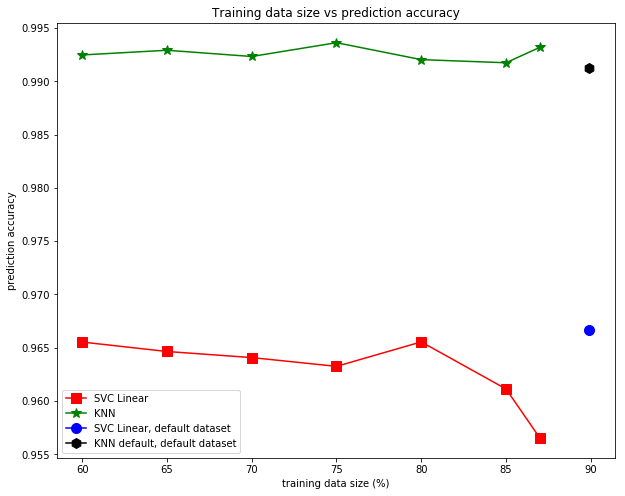

In [33]:
training_data_size = [60, 65, 70, 75, 80, 85, 87]

plt.figure(figsize=(10,8))
plt.plot(training_data_size, accuracy_model_one, marker='s', markersize=10, color='r', label='SVC Linear')
plt.plot(training_data_size, accuracy_model_two, marker='*', markersize=10, color='g', label='KNN')

plt.plot(original_training_data_size, accuracy_model_one_default, marker='o', markersize=10, color='b', label='SVC Linear, default dataset')
plt.plot(original_training_data_size, accuracy_model_two_default, marker='h', markersize=10, color='k', label='KNN default, default dataset')

plt.xlabel('training data size (%)')
plt.ylabel('prediction accuracy')
plt.title('Training data size vs prediction accuracy')
plt.legend()


# TESS

In [34]:
tess_data_one = pd.read_csv('tess-time-series/GJ143b.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_one.shape)
print(tess_data_one.head())

(rows, columns) in tess data: (123, 5)
              0       1      2   3  4
0  2.447869e+06  8.2469  0.021  16  1
1  2.447869e+06  8.2393  0.015  16  1
2  2.447893e+06  8.1808  0.016  16  1
3  2.447893e+06  8.2412  0.016  18  1
4  2.447893e+06  8.2202  0.009  16  1


Text(0, 0.5, 'Magnitude')

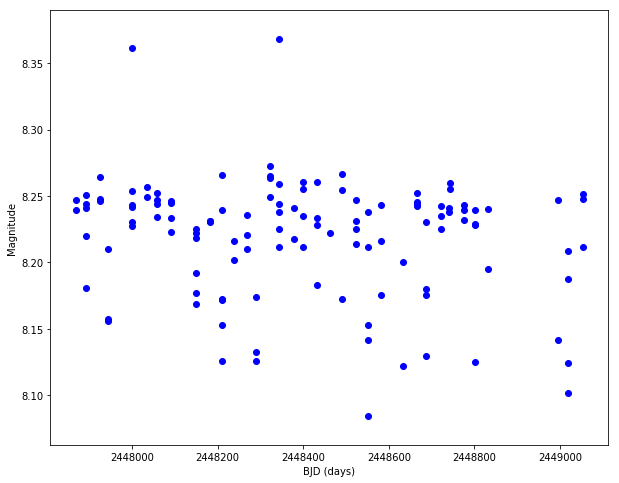

In [35]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_one[0], tess_data_one[1], color='b')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

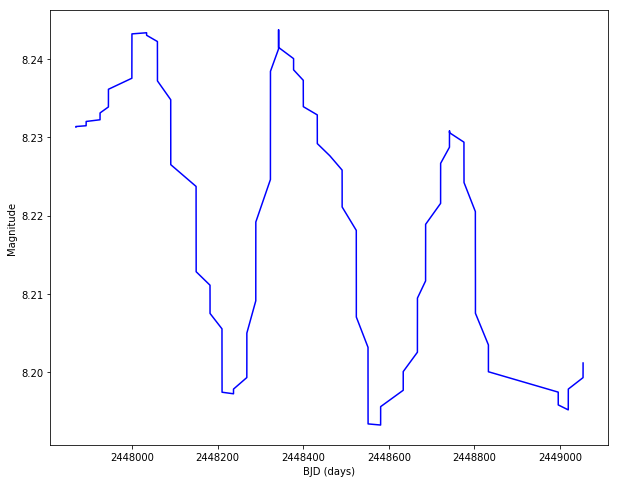

In [36]:
tess_data_one_smoothened = ndimage.filters.gaussian_filter(tess_data_one[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_one[0], tess_data_one_smoothened, color='b')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

In [37]:
tess_data_two = pd.read_csv('tess-time-series/HD1397b.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_two.shape)
print(tess_data_two.head())

(rows, columns) in tess data: (152, 5)
              0       1      2  3  4
0  2.447873e+06  7.9311  0.011  0  1
1  2.447890e+06  7.9332  0.010  0  1
2  2.447891e+06  7.9456  0.010  0  1
3  2.447891e+06  7.9412  0.012  0  1
4  2.447928e+06  7.9290  0.011  0  1


Text(0, 0.5, 'Magnitude')

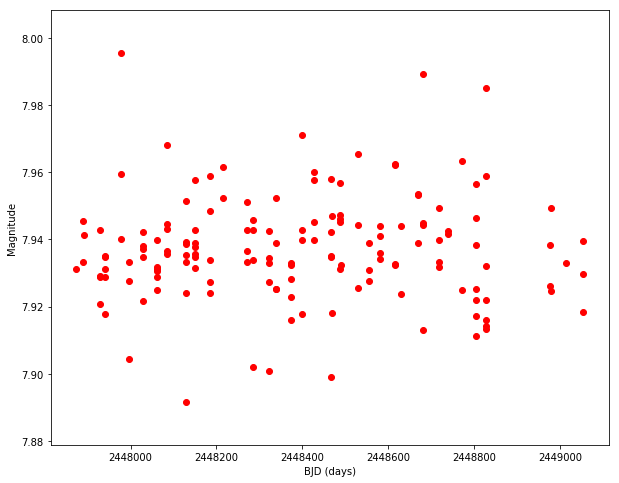

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_two[0], tess_data_two[1], color='r')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

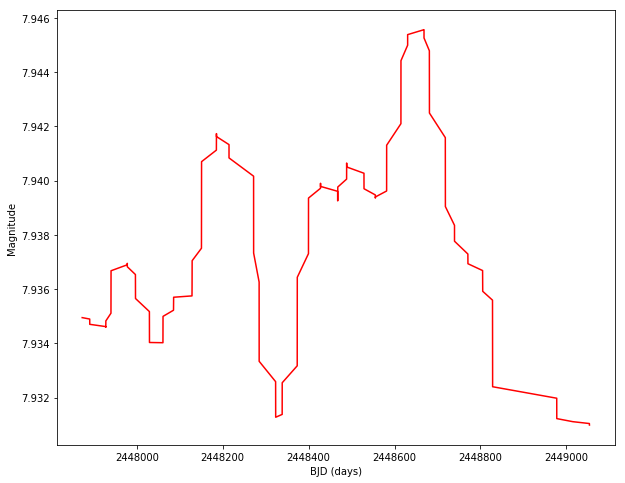

In [39]:
tess_data_two_smoothened = ndimage.filters.gaussian_filter(tess_data_two[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_two[0], tess_data_two_smoothened, color='r')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

In [40]:
tess_data_three = pd.read_csv('tess-time-series/HD23472b.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_three.shape)
print(tess_data_three.head())

(rows, columns) in tess data: (102, 5)
              0       1      2  3  4
0  2.447893e+06  9.8538  0.016  1  1
1  2.447893e+06  9.8591  0.020  1  1
2  2.447945e+06  9.8711  0.020  0  1
3  2.447945e+06  9.8548  0.019  0  1
4  2.447980e+06  9.8688  0.016  1  1


Text(0, 0.5, 'Magnitude')

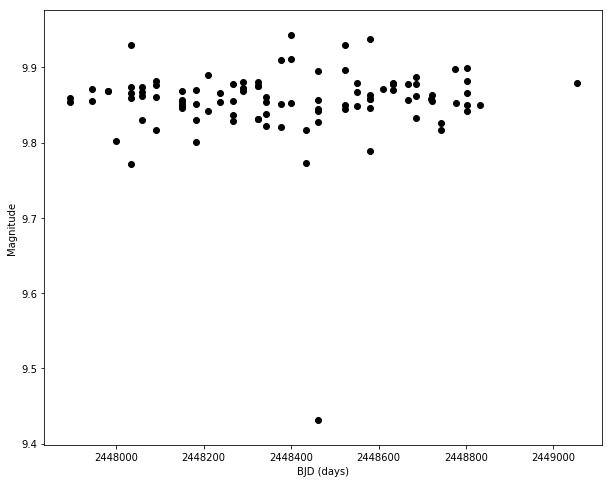

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_three[0], tess_data_three[1], color='k')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

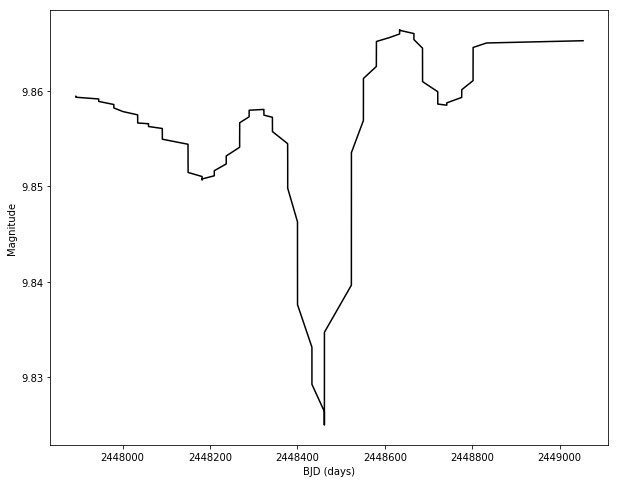

In [42]:
tess_data_three_smoothened = ndimage.filters.gaussian_filter(tess_data_three[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_three[0], tess_data_three_smoothened, color='k')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

In [43]:
tess_data_four = pd.read_csv('tess-time-series/HD39091c.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_four.shape)
print(tess_data_four.head())

(rows, columns) in tess data: (137, 5)
              0       1      2  3  4
0  2.447836e+06  5.7893  0.005  1  1
1  2.447836e+06  5.7854  0.004  1  1
2  2.447836e+06  5.7944  0.005  1  1
3  2.447836e+06  5.7852  0.005  1  1
4  2.447889e+06  5.7697  0.006  1  1


Text(0, 0.5, 'Magnitude')

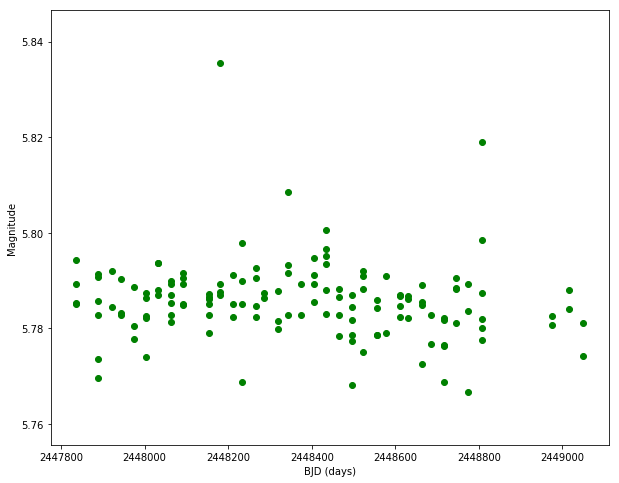

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_four[0], tess_data_four[1], color='g')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

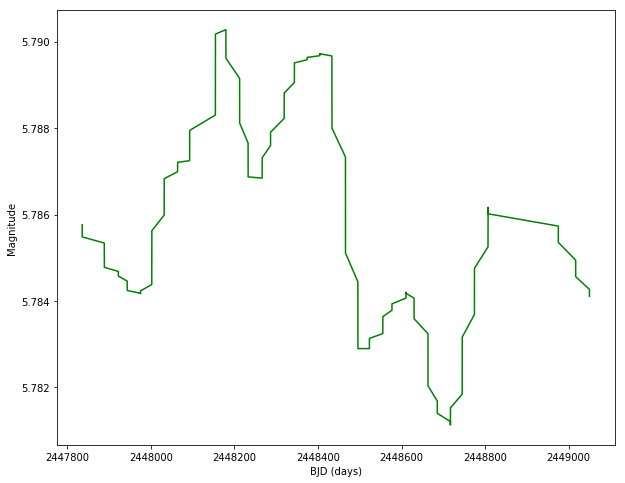

In [45]:
tess_data_four_smoothened = ndimage.filters.gaussian_filter(tess_data_four[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_four[0], tess_data_four_smoothened, color='g')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

In [46]:
tess_data_five = pd.read_csv('tess-time-series/HD221416b.csv',skiprows=10, header=None)
print("(rows, columns) in tess data:", tess_data_five.shape)
print(tess_data_five.head())

(rows, columns) in tess data: (66, 5)
              0       1      2  3  4
0  2.447897e+06  8.3114  0.013  0  1
1  2.447897e+06  8.3175  0.016  0  1
2  2.448027e+06  8.3168  0.011  0  1
3  2.448027e+06  8.3112  0.010  0  1
4  2.448027e+06  8.3011  0.010  0  1


Text(0, 0.5, 'Magnitude')

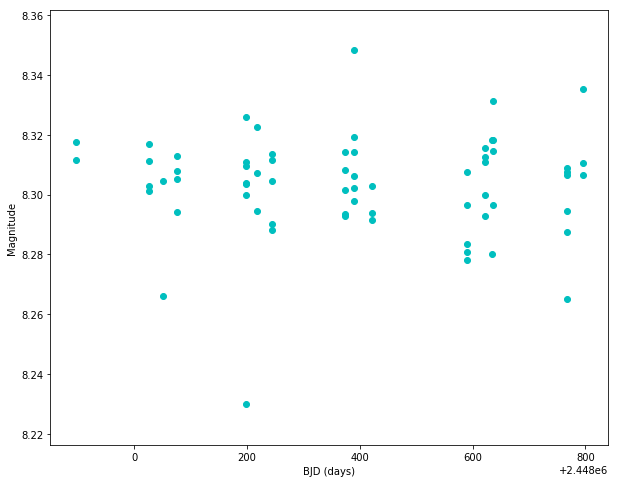

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(tess_data_five[0], tess_data_five[1], color='c')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

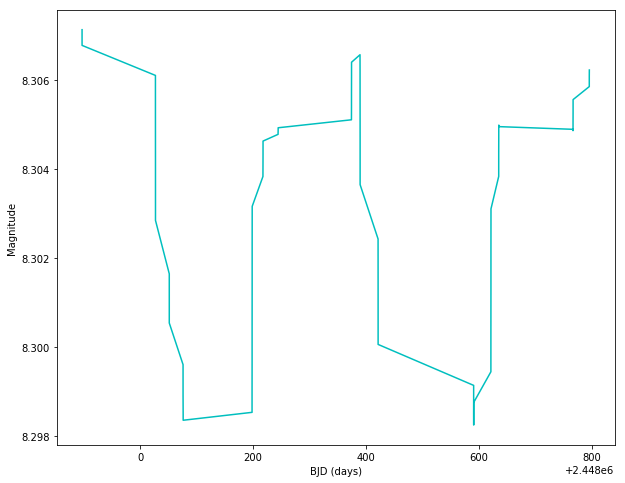

In [48]:
tess_data_five_smoothened = ndimage.filters.gaussian_filter(tess_data_five[1], sigma=5)
plt.figure(figsize=(10,8))
plt.plot(tess_data_five[0], tess_data_five_smoothened, color='c')
plt.xlabel('BJD (days)')
plt.ylabel('Magnitude')